0. Instalación e importación de  librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ccf1b101f96179bbf360bad75b4f2575b59a9adf83ea793cd1204cb9c5e87617
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

Usamos spaCy porque es una herramienta potente y rápida para analizar texto en español. Nos permite descomponer oraciones, identificar palabras clave y reconocer nombres, fechas y otros elementos importantes.

In [ ]:
pip install spacy

Usamos num2words en este proyecto porque permite convertir números a texto en español de forma sencilla

In [ ]:
pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b9b738c40d3099538d01dc6a29f60761341411204438f0aaba6196df2e8be9c3
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


Para este proyecto, instalamos y usamos librerías clave para el análisis de texto en español.

spaCy nos ayuda a procesar el lenguaje de forma estructurada, nltk aporta listas de stopwords, y num2words convierte números en palabras.

pandas y numpy facilitan la manipulación de datos, mientras que matplotlib permite visualizarlos.

 Además, incluimos herramientas como pandas-profiling para explorar los datos y scikit-learn para modelos de clasificación. También usamos expresiones regulares y normalización con re y unicodedata, para tareas de preprocesamiento

In [ ]:
# Instalación de librerias
import spacy
import pandas as pd
import numpy as np
import sys
from nltk.corpus import stopwords
from num2words import num2words

!{sys.executable} -m pip install pandas-profiling

import re,unicodedata


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.2 requir

## 1)Entendimiento de los datos.

    1.1) Carga de datos, usamos pandas ya que poporciona funciones intuitivas
     para cargar, limpiar, transformar y analizar datos, además de la gran compatibilidad entre archivos .CSV y pandas


In [ ]:

# Uso de la libreria pandas para la lectura de archivos
train_data = pd.read_csv('fake_news_spanish.csv',sep=None, encoding = 'utf-8',engine='python')
validation_data = pd.read_csv('fake_news_test.csv',sep=None, encoding = 'utf-8',engine='python')


# Asignación a una nueva variable de los datos leidos
train_data_copy = train_data
validation_data_copy = validation_data

# imprimir primeras filas de cada archivo para verificar la carga
print("Datos de entrenamiento:")
print(train_data.head())

print("\nDatos de validación:")
print(validation_data.head())


Datos de entrenamiento:
   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  
0  El diario británico publicó este pasado jueves...  02/06/2023  
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023  
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022  
3  En política, igual que hay que negociar con lo...  03/01/2022  
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018  

Datos de validación:
   ID                                             Titulo  \
0  ID  La mesa del congreso censura un encuentro inte...   
1  ID  La brecha digital que 

In [ ]:

from ydata_profiling import ProfileReport
ProfileReport(train_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Calidad de los datos

### Unicidad
En el análisis de unicidad, con la ayuda de ydataprofiling y la grafíca superios,  observamos que de un total de 57.063 registros, solo 49.638 son distintos, lo que significa que hay 430 registros duplicados en el dataset.  Además, notamos que la columna ID no aporta información útil, ya que cada registro tiene el mismo valor, por lo que decidimos descartarla en los siguientes pasos.

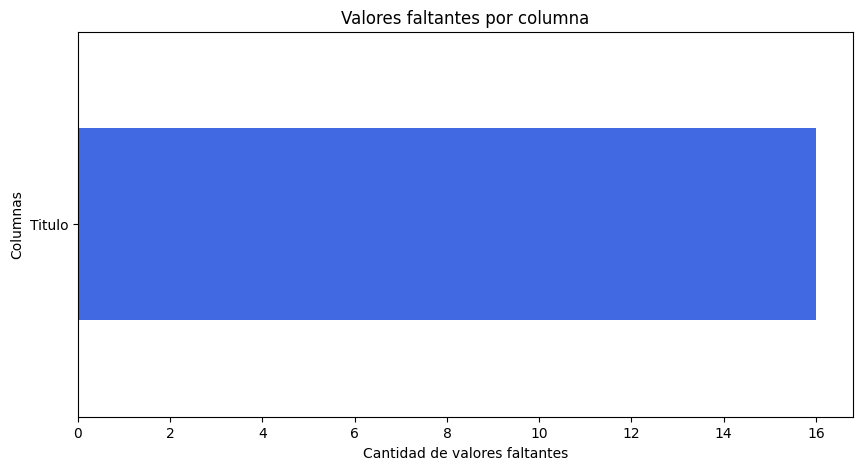

In [ ]:
#  valores faltantes por columna
missing_values = train_data.isnull().sum()

# filtor solo las columnas con valores faltantes
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 5))
missing_values.sort_values().plot(kind='barh', color='royalblue')
plt.xlabel("Cantidad de valores faltantes")
plt.ylabel("Columnas")
plt.title("Valores faltantes por columna")
plt.show()

### Completitud
En el análisis de completitud, observamos que faltan 16 valores en la columna "Título". Aunque es un porcentaje pequeño respecto al total de datos, es importante considerar cómo manejar estos casos, como grupo, decidimos eliminarlos, al considerar que una descripcion sin título podría afectar negativamente los resultados de los modelos.

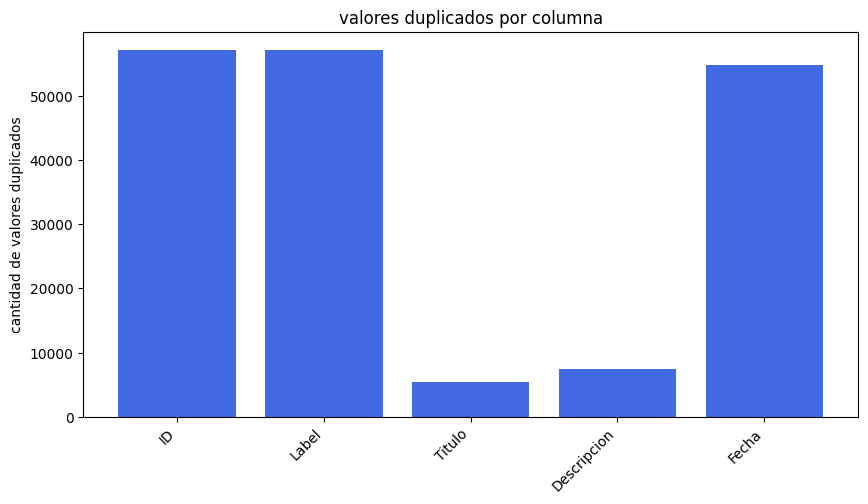

In [ ]:
# valores únicos y duplicados por columna
unique_counts = train_data.nunique()
duplicate_counts = train_data.shape[0] - unique_counts  # total menos  únicos

# filtrar solo columnas con duplicados (para que no haya barras vacías)
duplicate_counts = duplicate_counts[duplicate_counts > 0]


plt.figure(figsize=(10, 5))
plt.bar(duplicate_counts.index, duplicate_counts.values, color="royalblue")
plt.xticks(rotation=45, ha="right")  # Rotar nombres de columnas para mejor visualización
plt.ylabel("cantidad de valores duplicados")
plt.title("valores duplicados por columna")
plt.show()

Para analizar la unicidad de los datos, identificamos cuántos valores duplicados hay en cada columna. Observamos lo siguiente:

- La columna ID tiene valores duplicados, lo que indica que no es un identificador único y podría descartarse.

- Label (la etiqueta que indica si una noticia es falsa o no) se repite porque todas las noticias están clasificadas, lo cual es esperado.

- Fecha muestra una gran cantidad de valores repetidos, lo que sugiere que hay noticias agrupadas en días específicos.

- En Título y Descripción, hay duplicados, pero en menor proporción, lo que nos indica que existen noticias idénticas o muy similares.

### Consistencia


- Revisaremos si hay fechas duplicadas en noticias con títulos distintos.
Verificaremos si hay fechas futuras (posteriores a la actual).
-  Verificaremos si un mismo título tiene múltiples descripciones diferentes.
Calcularemos una métrica de similitud entre títulos repetidos para ver si realmente son iguales o hay errores.
- Comprobaremos que solo existan valores 0 y 1 en la columna de etiquetas.

- Buscaremos si existen descripciones idénticas con diferentes labels.


In [ ]:
# fechas duplicadas con títulos distintos
fechas_duplicadas = train_data.groupby('Fecha')['Titulo'].nunique().reset_index()
fechas_duplicadas = fechas_duplicadas[fechas_duplicadas['Titulo'] > 1]
print("Fechas con múltiples títulos:")
print(fechas_duplicadas)


Fechas con múltiples títulos:
           Fecha  Titulo
0     01/01/2018       9
1     01/01/2019       8
2     01/01/2020       6
3     01/01/2021       5
4     01/01/2022       6
...          ...     ...
2265  31/12/2018       6
2266  31/12/2019      12
2267  31/12/2020       8
2268  31/12/2021       9
2269  31/12/2022      10

[2022 rows x 2 columns]


Al analizar la relación entre las fechas y los títulos, encontramos que algunas fechas tienen más de un título asociado. Esto significa que en un mismo día se registraron múltiples noticias con títulos distintos, lo cual es esperable en un conjunto de datos de noticias.

Sin embargo, si la base de datos estuviera destinada a eventos únicos por día, esto podría indicar una inconsistencia. En nuestro caso, este hallazgo no representa necesariamente un problema, pero es importante tenerlo en cuenta

In [ ]:

# relación entre Título y Descripción
#  títulos repetidos con descripciones diferentes
titulos_variados = train_data.groupby('Titulo')['Descripcion'].nunique().reset_index()
titulos_variados = titulos_variados[titulos_variados['Descripcion'] > 1]
print("Títulos con múltiples descripciones:")
print(titulos_variados)



Títulos con múltiples descripciones:
                                                  Titulo  Descripcion
8      "La quimioterapia mata a la gente y no al cánc...            2
16     #DespuésDeAplaudir queda mucho por hacer y rei...            2
18     '11 millones de euros por teléfono y por Whats...            2
24     'A este hay que matarlo'... Las perlas de las ...            2
27     'A mi madre la llevaron al sótano de la reside...            2
...                                                  ...          ...
51570  ​El vandalismo de extrema derecha se ceba con ...            2
51572  ​La Justicia tuerta: cuando víctimas del franq...            2
51573  ​La agenda completa de las movilizaciones del ...            2
51586  “El discurso contra la discriminación de la mu...            2
51593  “La peor enfermedad que hay en las institucion...            2

[4934 rows x 2 columns]


Al analizar la relación entre los títulos y las descripciones, encontramos 4.934 casos en los que un mismo título está asociado a más de una descripción. Esto sugiere que pueden existir variaciones en la redacción de una misma noticia sin que esto implique un error en los datos.

Dado que en ninguno de estos casos un título tiene más de 4 descripciones, y en la mayoría de los casos solo tiene 2, consideramos que esta anomalía no afectará significativamente la vectorización del texto en el preprocesamiento. Sin embargo, hacemos esta observación para tenerla en cuenta al interpretar los resultados del análisis.



In [ ]:
# revisión de la columna Label
valores_label = train_data['Label'].unique()
print("Valores en la columna Label:", valores_label)



Valores en la columna Label: [1 0]


Al revisar la columna Label, encontramos que solo contiene los valores 0 y 1, lo cual es consistente con su función de clasificar las noticias en dos categorías (posiblemente "fake news" y "noticias reales").

In [ ]:
# buscar descripciones idénticas con diferentes label
descripciones_conflictivas = train_data.groupby('Descripcion')['Label'].nunique().reset_index()
descripciones_conflictivas = descripciones_conflictivas[descripciones_conflictivas['Label'] > 1]
print("Descripciones idénticas con distintas etiquetas:")
print(descripciones_conflictivas)


Descripciones idénticas con distintas etiquetas:
                                             Descripcion  Label
127    (Risas) Sí...lo que pasa es que esto viene ya ...      2
135    134 miembros destacados de la formación catala...      2
143    43 años y medio después de jurar los principio...      2
150    5.000 sanitarios de los Centros de Salud de la...      2
160    A Boye, el abogado de Puigdemont, se le relaci...      2
...                                                  ...    ...
49610  “No puede ser. No podemos hipotecarnos de esa ...      2
49613  “Que el gobierno presente cargos penales contr...      2
49622  “Tenemos los votos, tenemos los escaños, tenem...      2
49623  “Tiene el total respaldo del Gobierno”, afirma...      2
49637  ● ¿Qué es el debate sobre el estado de la naci...      2

[6851 rows x 2 columns]


Al igual que en el caso anterior, donde encontramos títulos con múltiples descripciones, identificamos 6,851 descripciones idénticas que tienen etiquetas diferentes (0 y 1). Esto podría indicar errores en la clasificación o noticias que han cambiado de contexto con el tiempo.

Sin embargo, dado que la vectorización del texto en el preprocesamiento transforma las noticias en representaciones numéricas que capturan su significado general, estas inconsistencias no deberían afectar significativamente el desempeño del modelo.

###  Preprocesamiento de texto
 En esta etapa, preprocesamos el texto para limpiarlo y estructurarlo mejor antes del análisis. Primero, convertimos todo a minúsculas para evitar diferencias innecesarias entre palabras. Luego, reemplazamos los números por su versión en palabras para que conserven su significado. También eliminamos puntuación y caracteres no ASCII para evitar ruido en los datos. Finalmente, quitamos las stopwords (palabras muy comunes que no aportan mucho significado) para centrarnos en los términos más relevantes. Este proceso es clave para mejorar la calidad de los datos y soportar un análisis útil.

In [ ]:

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = [word.lower() for word in words if word is not None]
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\sáéíóúñÁÉÍÓÚÑ]', '', word)  # Permitir caracteres especiales del español
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():  # Si la palabra es un número
            new_word = num2words(word, lang='es')  # Convertir el número a texto en español
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))  # Cargar stopwords en español
    new_words = [word for word in words if word is not None and word not in stop_words]
    return new_words

def preprocessing(words):
    """Preprocess a list of tokenized words"""
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

Aquí expandimos contracciones en español para hacer que el texto sea más claro y estructurado. Reemplazamos palabras como "al" por "a el" y "del" por "de el", lo que ayuda a que los modelos de análisis entiendan mejor la estructura de las frases. Aunque estas contracciones son comunes en español, expandirlas puede ser útil para ciertos algoritmos que analizan palabras de forma separada.

In [ ]:
def expand_contractions_es(text):
    text = re.sub(r'\bal\b', 'a el', text)  # "al" -> "a el"
    text = re.sub(r'\bdel\b', 'de el', text)  # "del" -> "de el"
    return text

Aquí manejamos los datos faltantes y preparamos el texto para el análisis. Primero, reemplazamos los valores NaN con cadenas vacías para evitar errores al procesar el texto. Luego, aplicamos la función que expande contracciones en español, asegurando que palabras como "al" y "del" sean transformadas en "a el" y "de el". Esto ayuda a mejorar la comprensión del texto por parte de los modelos, haciéndolo más claro y estructurado.

In [ ]:
# reemplzar NaN con una cadena vacía
train_data['Titulo'] = train_data['Titulo'].fillna('')
train_data['Descripcion'] = train_data['Descripcion'].fillna('')
validation_data['Titulo'] = validation_data['Titulo'].fillna('')
validation_data['Descripcion'] = validation_data['Descripcion'].fillna('')

# aplicar  la función para expandir contracciones
train_data['Titulo'] = train_data['Titulo'].apply(expand_contractions_es)
train_data['Descripcion'] = train_data['Descripcion'].apply(expand_contractions_es)
validation_data['Titulo'] = validation_data['Titulo'].apply(expand_contractions_es)
validation_data['Descripcion'] = validation_data['Descripcion'].apply(expand_contractions_es)

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


cargamos el modelo es_core_news_sm de spaCy, que está entrenado para procesar texto en español. Este modelo nos permite realizar tareas como tokenización, lematización, reconocimiento de entidades y análisis gramatical. Es una parte clave del preprocesamiento, ya que ayuda a estructurar mejor el texto para su análisis.

In [ ]:
nlp = spacy.load("es_core_news_sm")

Aquí usamos spaCy para tokenizar los textos de manera eficiente. En lugar de procesar palabra por palabra, usamos nlp.pipe(), que permite trabajar con lotes grandes (batch_size=1000), acelerando el procesamiento. Extraemos los tokens de cada texto y los almacenamos en nuevas columnas, lo que facilita el análisis posterior.

Tokenizar es clave porque nos permite dividir el texto en palabras o unidades significativas, preparando los datos para tareas útiles en el modelado.








In [ ]:
import spacy

# Función para tokenizar una lista de textos en lote
def tokenize_with_spacy_batch(texts, batch_size=1000):
    tokens = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        tokens.append([token.text for token in doc])
    return tokens

# Aplicar la función a las columnas 'Titulo' y 'Descripcion'
train_data['Titles'] = tokenize_with_spacy_batch(train_data['Titulo'].tolist())
train_data['Descriptions'] = tokenize_with_spacy_batch(train_data['Descripcion'].tolist())
validation_data['Titles'] = tokenize_with_spacy_batch(validation_data['Titulo'].tolist())
validation_data['Descriptions'] = tokenize_with_spacy_batch(validation_data['Descripcion'].tolist())

En este paso, eliminamos cualquier valor nulo de la columna Titlesy Descriptions usando dropna(). Esto es importante porque algunos títulos/descripciones podrían estar vacíos o faltar, lo que podría afectar el procesamiento posterior.:

In [ ]:
train_data['Titles'].dropna()

,Titles
0,"[', The, Guardian, ', va, con, Sánchez, :, ', ..."
1,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE..."
2,"[El, ', Ahora, o, nunca, ', de, Joan, Fuster, ..."
3,"[Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ..."
4,"[Puigdemont, :, ', No, sería, ninguna, tragedi..."
...,...
57058,"[El, Defensor, de, el, Pueblo, reclama, a, la,..."
57059,"[El, EQUO, plantea, ceder, la, presidencia, de..."
57060,"[Alberto, Garzón, :, ', Que, los, Borbones, so..."
57061,"[Vox, exige, entrar, en, el, Gobierno, de, Cas..."


In [ ]:
train_data['Descriptions'].dropna()

,Descriptions
0,"[El, diario, británico, publicó, este, pasado,..."
1,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE..."
2,"[El, valencianismo, convoca, en, Castelló, su,..."
3,"[En, política, ,, igual, que, hay, que, negoci..."
4,"[En, una, entrevista, en, El, Punt, Avui, ,, e..."
...,...
57058,"[El, gobierno, regional, han, indicado, que, l..."
57059,"[Si, la, higiene, democrática, nos, lleva, a, ..."
57060,"[El, coordinador, federal, de, IU, asegura, qu..."
57061,"[Santiago, Abascal, :, Vox, tiene, el, derecho..."


Descargamos la lista de stopwords de nltk, que son palabras comunes como "el", "de", "y", que no aportan mucho significado en el análisis de texto. Estas palabras suelen eliminarse en el preprocesamiento para mejorar la calidad de la vectorización y evitar que influyan en el modelo de manera irrelevante.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Como parte del preprocesamiento del texto, aplicamos una serie de transformaciones a los títulos y descripciones de las noticias con el objetivo de eliminar ruido y mejorar la calidad de los datos antes del modelado.

Utilizamos la función preprocessing, que realiza varias tareas clave como:

- Conversión a minúsculas, para mantener uniformidad en el texto.
- Eliminación de caracteres especiales y puntuación, reduciendo elementos innecesarios que no aportan significado al análisis.
- Eliminación de stopwords, descartando palabras muy frecuentes que no aportan información relevante.
- Normalización de números y caracteres especiales, mejorando la coherencia del texto.

Aplicamos este proceso tanto a los títulos ('Titles' → 'Titles1') como a las descripciones ('Descriptions' → 'Descriptions1') en los conjuntos de entrenamiento y validación. De esta manera, garantizamos que los datos utilizados para el modelo estén en un formato más limpio y adecuado para la vectorización y posterior clasificación.



In [ ]:
train_data['Descriptions1']=train_data['Descriptions'].apply(preprocessing) #Aplica la eliminación del ruido
validation_data['Descriptions1']=validation_data['Descriptions'].apply(preprocessing) #Aplica la eliminación del ruido

train_data.head()

,ID,Label,Titulo,Descripcion,Fecha,Titles,Descriptions,Descriptions1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[', The, Guardian, ', va, con, Sánchez, :, ', ...","[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, ', Ahora, o, nunca, ', de, Joan, Fuster, ...","[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ...","[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[Puigdemont, :, ', No, sería, ninguna, tragedi...","[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram..."


In [ ]:
train_data['Titles1']=train_data['Titles'].apply(preprocessing) #Aplica la eliminación del ruido
validation_data['Titles1']=validation_data['Titles'].apply(preprocessing) #Aplica la eliminación del ruido

train_data.head()

,ID,Label,Titulo,Descripcion,Fecha,Titles,Descriptions,Descriptions1,Titles1
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023,"[', The, Guardian, ', va, con, Sánchez, :, ', ...","[El, diario, británico, publicó, este, pasado,...","[diario, britanico, publico, pasado, jueves, e...","[the, guardian, va, sanchez, europa, necesita,..."
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023,"[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...","[revelan, gobierno, negocio, liberacion, mirel...","[revelan, gobierno, negocio, liberacion, mirel..."
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022,"[El, ', Ahora, o, nunca, ', de, Joan, Fuster, ...","[El, valencianismo, convoca, en, Castelló, su,...","[valencianismo, convoca, castello, fiesta, gra...","[ahora, nunca, joan, fuster, estatuto, valenci..."
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022,"[Iglesias, alienta, a, Yolanda, Díaz, ,, ERC, ...","[En, política, ,, igual, que, hay, que, negoci...","[politica, igual, negociar, empresarios, negoc...","[iglesias, alienta, yolanda, diaz, erc, eh, bi..."
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018,"[Puigdemont, :, ', No, sería, ninguna, tragedi...","[En, una, entrevista, en, El, Punt, Avui, ,, e...","[entrevista, punt, avui, lider, jxcat, desdram...","[puigdemont, seria, ninguna, tragedia, repetic..."


Como parte del preprocesamiento, aplicamos dos técnicas clave para la normalización del texto: stemming y lematización. Estas transformaciones permiten reducir las palabras a sus formas base, eliminando variaciones  y mejorando la representación del texto para el modelo.

- Stemming: Se utilizó el algoritmo Snowball Stemmer en español para reducir las palabras a su raíz común. Esto ayuda a unificar palabras con el mismo significado pero diferentes formas (ejemplo: jugando → jug).
- Lematización: Con ayuda de spaCy, realizamos lematización únicamente en los verbos, transformándolos a su forma base (ejemplo: corriendo → correr). Esto permite preservar la estructura del lenguaje sin perder significado.


Este procesamiento se aplicó a la columna de descripciones preprocesadas ('Descriptions1') tanto en el conjunto de entrenamiento como en el de validación. Como resultado, obtenemos dos nuevas columnas:

- 'Stems': Contiene las palabras transformadas con stemming.
- 'Lemmas': Contiene los verbos lematizados.
Estas transformaciones buscan mejorar la calidad del texto antes de su vectorización, ayudando a reducir dimensionalidad y hacer que el modelo generalice mejor.

In [ ]:
import pandas as pd
from nltk.stem import SnowballStemmer
import spacy

# Cargar el modelo de spaCy
nlp = spacy.load("es_core_news_sm", disable=["parser", "ner"])

# Crear un stemmer para español
stemmer = SnowballStemmer("spanish")

# Función para aplicar stemming a una lista de palabras
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Función para aplicar lematización a una lista de palabras (solo verbos)
def lemmatize_verbs(words):
    doc = nlp(" ".join(words))
    return [token.lemma_ for token in doc if token.pos_ == "VERB"]

# Función para procesar en lote
def process_batch(texts):
    stems = [stem_words(words) for words in texts]  # Aplicar stemming a cada lista de palabras
    lemmas = [lemmatize_verbs(words) for words in texts]  # Aplicar lematización a cada lista de palabras
    return stems, lemmas

# Aplicar el procesamiento en lote a las columnas
train_stems, train_lemmas = process_batch(train_data['Descriptions1'].tolist())
train_data['Stems'] = train_stems
train_data['Lemmas'] = train_lemmas

validation_stems, validation_lemmas = process_batch(validation_data['Descriptions1'].tolist())
validation_data['Stems'] = validation_stems
validation_data['Lemmas'] = validation_lemmas

# Mostrar las primeras filas del DataFrame
print(train_data.head())

   ID  Label                                             Titulo  \
0  ID      1  'The Guardian' va con Sánchez: 'Europa necesit...   
1  ID      0  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...   
2  ID      1  El 'Ahora o nunca' de Joan Fuster sobre el est...   
3  ID      1  Iglesias alienta a Yolanda Díaz, ERC y EH Bild...   
4  ID      0  Puigdemont: 'No sería ninguna tragedia una rep...   

                                         Descripcion       Fecha  \
0  El diario británico publicó este pasado jueves...  02/06/2023   
1  REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...  01/10/2023   
2  El valencianismo convoca en Castelló su fiesta...  25/04/2022   
3  En política, igual que hay que negociar con lo...  03/01/2022   
4  En una entrevista en El Punt Avui, el líder de...  09/03/2018   

                                              Titles  \
0  [', The, Guardian, ', va, con, Sánchez, :, ', ...   
1  [REVELAN, QUE, EL, GOBIERNO, NEGOCIO, LA, LIBE...   
2  [El, ', Ahora, o,

Usamos 'Titles1' y 'Descriptions1' como textos preprocesados, 'Stems' para normalizar palabras con stemming y 'Lemmas' para mantener la semántica de los verbos. La variable objetivo 'Label' clasifica las noticias (0 = real, 1 = falsa). Esta combinación mejora la detección de patrones en los modelos.

In [ ]:
X = train_data[['Titles1', 'Descriptions1', 'Stems', 'Lemmas']]
y = train_data['Label']

**Vectorización**

### Vectorización del Texto
Aplicamos TF-IDF a los títulos, descripciones, stems y lemas, limitando a 5,000 características por columna para reducir la dimensionalidad. Luego, combinamos las representaciones en una sola matriz para capturar mejor la información del texto.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Vectorizar cada columna de texto (solo ajustar a los datos de entrenamiento)
vectorizer_titles = TfidfVectorizer(max_features=5000)
X_titles_train = vectorizer_titles.fit_transform(train_data['Titles1'].apply(lambda x: " ".join(x)))

vectorizer_descriptions = TfidfVectorizer(max_features=5000)
X_descriptions_train = vectorizer_descriptions.fit_transform(train_data['Descriptions1'].apply(lambda x: " ".join(x)))

vectorizer_stems = TfidfVectorizer(max_features=5000)
X_stems_train = vectorizer_stems.fit_transform(train_data['Stems'].apply(lambda x: " ".join(x)))

vectorizer_lemmas = TfidfVectorizer(max_features=5000)
X_lemmas_train = vectorizer_lemmas.fit_transform(train_data['Lemmas'].apply(lambda x: " ".join(x)))

# Combinar todas las matrices en una sola
X_combined_train = hstack([X_titles_train, X_descriptions_train, X_stems_train, X_lemmas_train])

# Desarrollo de los modelos

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el dataset (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_combined_train, y, test_size=0.2, random_state=42)

**Random Forest (Diego Rodriguez):** Los arboles de decisión son bastante fuertes a la hora de enfrentarnos a tareas de clasificación, estos se pueden hacer mucho más robustos y podemos evitar más el sobreajuste al usar Random Forest, en este algoritmo, se generan varios arboles distintos, en este caso se usaron 100, al recibir una entrada, los arboles se ejecutan y se genera una votación entre ellos, la clase que se le asignará a la entrada será aquella con más votos entre los 100 arboles. La desventaja con este algoritmo, es que toma bastante tiempo en entrenarse, ya que se están entrenando 100 arboles de forma individual.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Entrenar el modelo
modelTree = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
modelTree.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelTree.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4808
           1       0.90      0.94      0.92      6605

    accuracy                           0.91     11413
   macro avg       0.91      0.90      0.90     11413
weighted avg       0.91      0.91      0.91     11413

Precisión: 0.9071


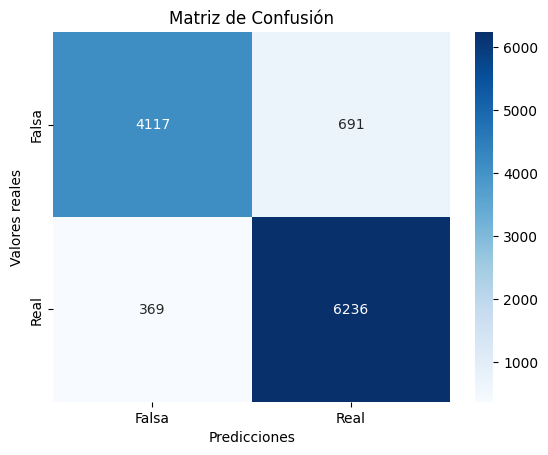

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

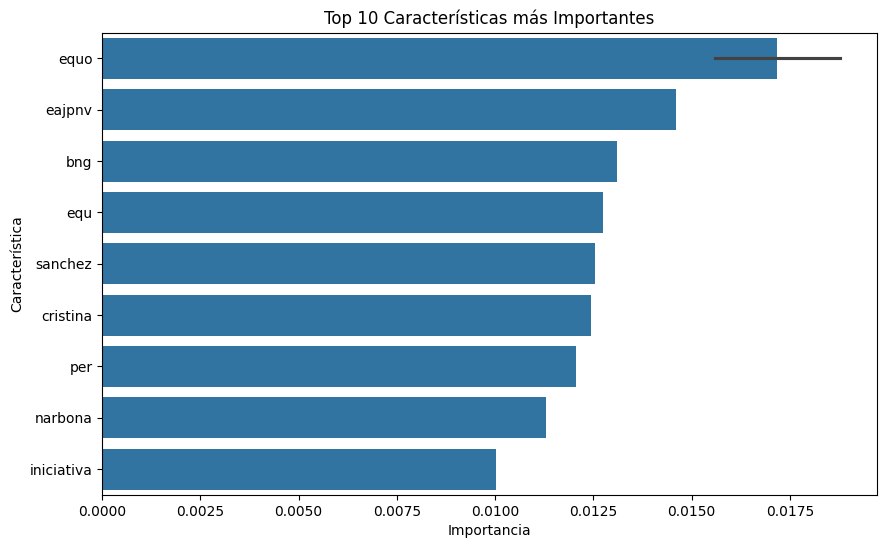

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la importancia de las características
importancias = modelTree.feature_importances_

# Obtener los nombres de las características de cada vectorizador
feature_names_titles = vectorizer_titles.get_feature_names_out()
feature_names_descriptions = vectorizer_descriptions.get_feature_names_out()
feature_names_stems = vectorizer_stems.get_feature_names_out()
feature_names_lemmas = vectorizer_lemmas.get_feature_names_out()

# Combinar todos los nombres de características
feature_names = (
    list(feature_names_titles) +
    list(feature_names_descriptions) +
    list(feature_names_stems) +
    list(feature_names_lemmas)
)

# Crear un DataFrame con las características y sus importancias
importancias_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importancias})

# Ordenar por importancia
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancias_df.head(10))
plt.title('Top 10 Características más Importantes')
plt.show()

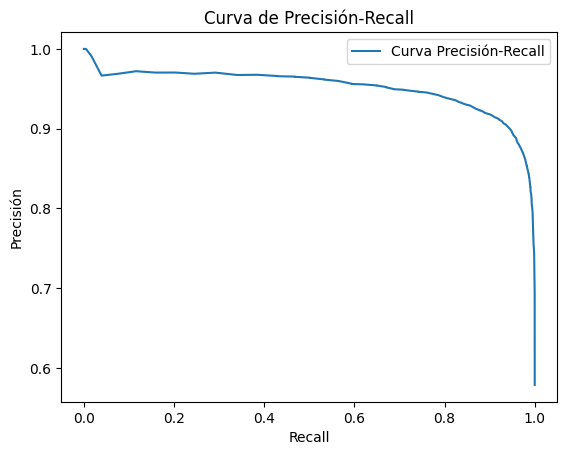

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Obtain predicted probabilities for the positive class (class 1)
y_pred_proba = modelTree.predict_proba(X_test)[:, 1]

# Calcular la precisión y el recall para la clase positiva (noticias falsas)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Graficar la curva de precisión-recall
plt.plot(recall, precision, label='Curva Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.legend()
plt.show()

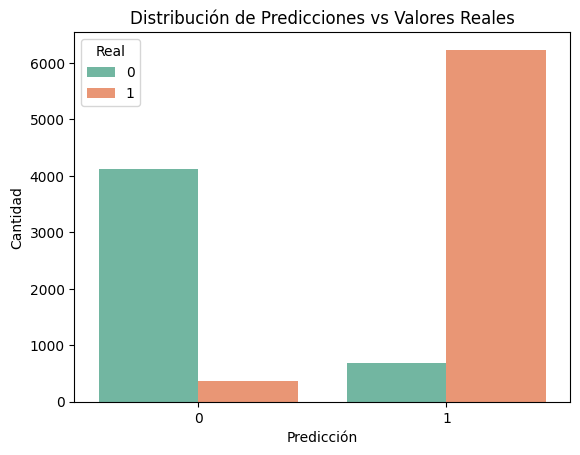

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones y los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Graficar la distribución de las predicciones
sns.countplot(x='Predicción', data=resultados, hue='Real', palette='Set2')
plt.title('Distribución de Predicciones vs Valores Reales')
plt.xlabel('Predicción')
plt.ylabel('Cantidad')
plt.legend(title='Real')
plt.show()

In [ ]:
"""from sklearn.tree import export_graphviz
import graphviz

arbol = modelTree.estimators_[0]

feature_names_titles = vectorizer_titles.get_feature_names_out()
feature_names_descriptions = vectorizer_descriptions.get_feature_names_out()
feature_names_stems = vectorizer_stems.get_feature_names_out()
feature_names_lemmas = vectorizer_lemmas.get_feature_names_out()

feature_names = (
    list(feature_names_titles) +
    list(feature_names_descriptions) +
    list(feature_names_stems) +
    list(feature_names_lemmas)
)


# Exportar el árbol a un archivo DOT
# Use the combined feature_names list instead of X_train.columns
dot_data = export_graphviz(arbol, out_file=None, feature_names=feature_names,
                          class_names=['Falsa', 'Real'], filled=True, rounded=True)

# Visualizar el árbol
graph = graphviz.Source(dot_data)
graph.render("arbol_random_forest")  # Guardar el árbol en un archivo
graph.view()  # Abrir el árbol en una ventana"""

'from sklearn.tree import export_graphviz\nimport graphviz\n\narbol = modelTree.estimators_[0]\n\nfeature_names_titles = vectorizer_titles.get_feature_names_out()\nfeature_names_descriptions = vectorizer_descriptions.get_feature_names_out()\nfeature_names_stems = vectorizer_stems.get_feature_names_out()\nfeature_names_lemmas = vectorizer_lemmas.get_feature_names_out()\n\nfeature_names = (\n    list(feature_names_titles) +\n    list(feature_names_descriptions) +\n    list(feature_names_stems) +\n    list(feature_names_lemmas)\n)\n\n\n# Exportar el árbol a un archivo DOT\n# Use the combined feature_names list instead of X_train.columns\ndot_data = export_graphviz(arbol, out_file=None, feature_names=feature_names,\n                          class_names=[\'Falsa\', \'Real\'], filled=True, rounded=True)\n\n# Visualizar el árbol\ngraph = graphviz.Source(dot_data)\ngraph.render("arbol_random_forest")  # Guardar el árbol en un archivo\ngraph.view()  # Abrir el árbol en una ventana'

**Naive Bayes (Andrés Charry):**  es un algoritmo especialmente adecuado para la clasificación de noticias falsas debido a su eficiencia y capacidad para manejar datos de alta dimensionalidad, como los que se encuentran en la representación de texto. Este modelo es rápido de entrenar y funciona bien con grandes volúmenes de datos, lo que lo hace ideal para tareas de procesamiento de lenguaje natural. Aunque asume independencia entre las características, su rendimiento en la clasificación de texto suele ser sorprendentemente bueno, especialmente cuando se combina con técnicas de vectorización como TF-IDF. Además, es robusto frente al ruido en los datos, lo que es útil en el contexto de noticias, donde el texto puede contener errores o variaciones.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Entrenar el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      4808
           1       0.83      0.93      0.88      6605

    accuracy                           0.85     11413
   macro avg       0.86      0.84      0.84     11413
weighted avg       0.85      0.85      0.85     11413

Precisión: 0.8493


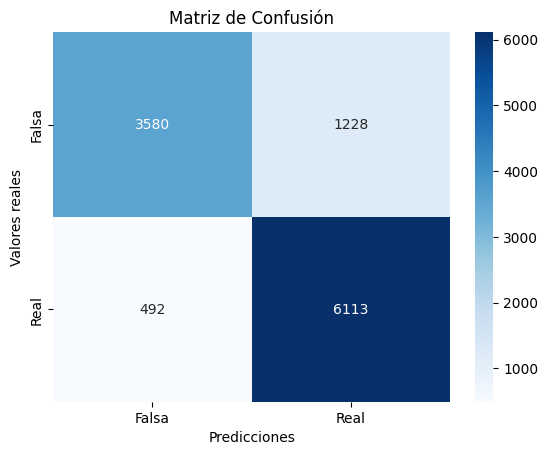

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

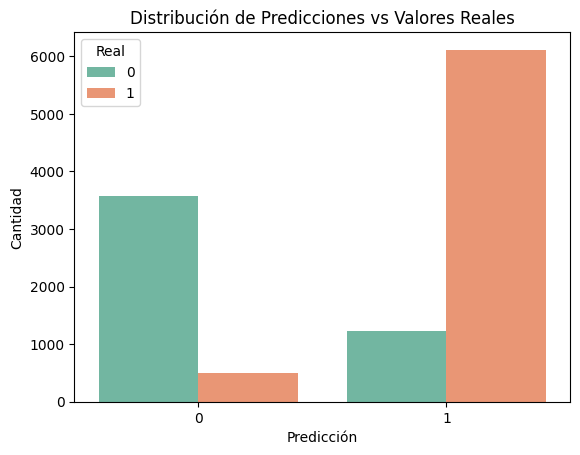

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones y los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Graficar la distribución de las predicciones
sns.countplot(x='Predicción', data=resultados, hue='Real', palette='Set2')
plt.title('Distribución de Predicciones vs Valores Reales')
plt.xlabel('Predicción')
plt.ylabel('Cantidad')
plt.legend(title='Real')
plt.show()

**Regresión Logística(Andrea Rodriguez):**  es un modelo simple pero especialmente útil cuando se necesita interpretabilidad, ya que proporciona coeficientes que indican la importancia de cada característica en la predicción. Además, este algoritmo es eficiente en términos computacionales y puede manejar tanto datos lineales como no lineales cuando se combina con transformaciones de características. Su capacidad para generar probabilidades de clase permite evaluar la confianza en las predicciones, lo que puede ser valioso para tomar decisiones informadas en la detección de noticias falsas.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4808
           1       0.89      0.93      0.91      6605

    accuracy                           0.90     11413
   macro avg       0.90      0.89      0.89     11413
weighted avg       0.90      0.90      0.89     11413

Precisión: 0.8951


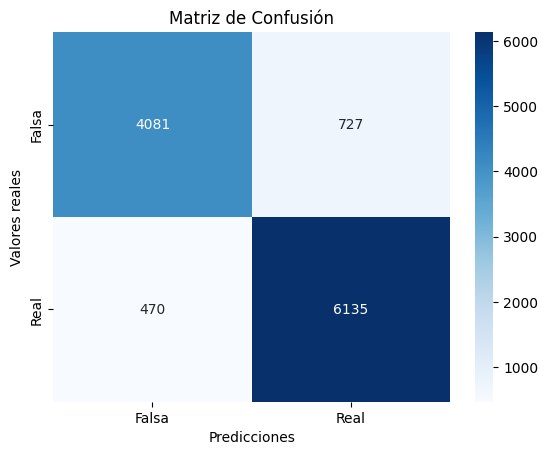

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falsa', 'Real'], yticklabels=['Falsa', 'Real'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

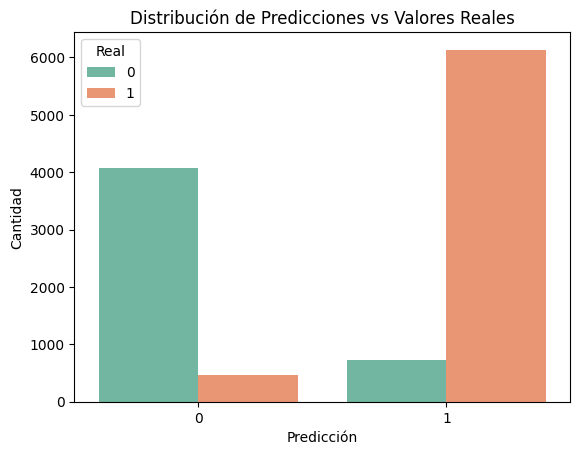

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones y los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Graficar la distribución de las predicciones
sns.countplot(x='Predicción', data=resultados, hue='Real', palette='Set2')
plt.title('Distribución de Predicciones vs Valores Reales')
plt.xlabel('Predicción')
plt.ylabel('Cantidad')
plt.legend(title='Real')
plt.show()

# Conclusiones de los modelos
Para todas las métricas calculadas, el algoritmo Random Forest generó los mejores resultados, esto debido a que

**Vectorización de los datos de prueba**

In [ ]:
X_titles_val = vectorizer_titles.transform(validation_data['Titles1'].apply(lambda x: " ".join(x)))
X_descriptions_val = vectorizer_descriptions.transform(validation_data['Descriptions1'].apply(lambda x: " ".join(x)))
X_stems_val = vectorizer_stems.transform(validation_data['Stems'].apply(lambda x: " ".join(x)))
X_lemmas_val = vectorizer_lemmas.transform(validation_data['Lemmas'].apply(lambda x: " ".join(x)))

X_combined_val = hstack([X_titles_val, X_descriptions_val, X_stems_val, X_lemmas_val])

In [ ]:
y_pred = modelTree.predict(X_combined_val)

validation_data['Predicciones'] = y_pred


In [ ]:
columnas_deseadas = ['Titulo', 'Descripcion', 'Fecha', 'Predicciones']
validation_data_filtrado = validation_data[columnas_deseadas]

validation_data_filtrado.to_csv("validation_con_predicciones.csv", index=False)

print(validation_data_filtrado.head())

                                              Titulo  \
0  La mesa de el congreso censura un encuentro in...   
1  La brecha digital que dificulta el acceso de a...   
2  PP apremia a el EQUO a presentar una propuesta...   
3  De soberano garante de la democracia a rey cor...   
4  El Gobierno aprobará este martes detraer los b...   

                                         Descripcion       Fecha  Predicciones  
0  Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...  30/10/2018             0  
1  No es la primera vez que los ciudadanos vulner...  15/03/2023             1  
2  El partido morado reprocha que los socialistas...  01/07/2019             0  
3  La renuncia de Felipe VI a su herencia, proced...  16/03/2020             1  
4  El Ejecutivo también prorrogará la suspensión ...  13/09/2021             1  


**Análisis del modelo**
Se realizó el análisis de 2 modelos, el modelo que usa Random Forest y el que usa Regresion logística ya que fueron los que tuvieron los mejores resultados. Ambos modelos mostraron comportamientos similares en cuanto a las palabras con la mayor importancia, lo cual sugiere que son aquellas con mayor presencia en las noticias falsas.

Regresion Logistica

In [ ]:
import pandas as pd
import numpy as np

coeficientes = model.coef_[0]

feature_names = (vectorizer_titles.get_feature_names_out().tolist() +
                 vectorizer_descriptions.get_feature_names_out().tolist() +
                 vectorizer_stems.get_feature_names_out().tolist() +
                 vectorizer_lemmas.get_feature_names_out().tolist())

coeficientes_df = pd.DataFrame({
    'Palabra': feature_names,
    'Coeficiente': coeficientes
})

coeficientes_df['Abs_Coeficiente'] = np.abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)

print(coeficientes_df.head(20))

        Palabra  Coeficiente  Abs_Coeficiente
1784       equo   -12.457278        12.457278
1636     eajpnv   -11.422138        11.422138
3598    podemos    10.996349        10.996349
651         bng   -10.675225        10.675225
4278    sanchez     9.944799         9.944799
3172    narbona    -8.392753         8.392753
759     canaria    -8.317788         8.317788
11847       equ    -8.103983         8.103983
6828       equo    -8.063508         8.063508
8579    podemos     7.830266         7.830266
1785        erc     7.370664         7.370664
3501        per    -7.251462         7.251462
3723     prieto    -7.245897         7.245897
4859       vers    -6.874028         6.874028
2177   gallardo    -6.867652         6.867652
1239   cristina    -6.816679         6.816679
5643        bng    -6.777131         6.777131
10657       bng    -6.739191         6.739191
6654     eajpnv    -6.709320         6.709320
11683    eajpnv    -6.679245         6.679245


Random Forest

In [ ]:
import pandas as pd

importancias = modelTree.feature_importances_

feature_names = (vectorizer_titles.get_feature_names_out().tolist() +
                 vectorizer_descriptions.get_feature_names_out().tolist() +
                 vectorizer_stems.get_feature_names_out().tolist() +
                 vectorizer_lemmas.get_feature_names_out().tolist())

importancias_df = pd.DataFrame({
    'Palabra': feature_names,
    'Importancia': importancias
})

importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

print(importancias_df.head(20))

          Palabra  Importancia
1784         equo     0.018784
6828         equo     0.015587
1636       eajpnv     0.014595
651           bng     0.013102
11847         equ     0.012748
4278      sanchez     0.012548
1239     cristina     0.012451
3501          per     0.012069
3172      narbona     0.011288
2522   iniciativa     0.010034
11683      eajpnv     0.009125
5643          bng     0.008746
10657         bng     0.008731
4859         vers     0.008467
8482          per     0.007267
9882         vers     0.006934
759       canaria     0.006885
2872      maestre     0.006635
760      canarias     0.006602
8579      podemos     0.006495


# Analisis
- Las palabras con mayor importancia tienen todas que ver con enfoques políticos, EQUO es un partido político espalol, al igual que EAJ-PNV, Podemos y BNG que son las palabras con la mayor importancia. Tambien se ven nombres y apellidos como es el caso de Sanchez y Cristina Narbona que son políticos españoles.


---

# Utilidad

- Identificar estas palabras clave permite a la organización mejorar sus algoritmos de detección de noticias falsas. Por ejemplo, se pueden crear reglas o filtros que prioricen la verificación de noticias que contengan estas palabras. En este caso, random forest toma decisiones segun las caracteristicas mas significativa. Ya que se le pueden dar más peso en la clasificacion en caso de que por ejemplo se usen redes neuronales que hacen uso de pesos.


- El análisis revela que las noticias falsas suelen centrarse en temas políticos y regionales, lo que ayuda a la organización a entender los patrones de desinformación y a desarrollar estrategias más efectivas para combatirlos.
Por ejemplo, se pueden crear campañas de verificación específicas para noticias relacionadas con figuras políticas como "Sanchez" o "Narbona".

- Conocer estas palabras clave permite a la organización educar al público sobre cómo identificar noticias falsas. Por ejemplo, se pueden crear guías o materiales educativos que adviertan sobre el uso de términos como "equo" o "podemos" en contextos manipulativos.

- Al centrarse en las palabras y temas más relevantes, la organización puede optimizar sus recursos y esfuerzos en la lucha contra la desinformación. Por ejemplo, se pueden asignar más recursos a la verificación de noticias relacionadas con temas políticos o regionales.
También se pueden desarrollar alianzas con organizaciones o medios de comunicación especializados en estos temas.


- Esta información permite a la organización tomar decisiones informadas sobre cómo abordar la desinformación. Por ejemplo, se pueden desarrollar políticas internas que prioricen la verificación de noticias que contengan estas palabras clave.


Roles y Responsabilidades del Equipo

## Andrea rodríguez -  Líder de Proyecto

Andrea estuvo a cargo de la gestión del proyecto, asegurando que se cumplieran los plazos y que cada miembro tuviera una carga de trabajo equilibrada. Coordinó las reuniones, organizó los entregables y supervisó el cumplimiento de la rúbrica. También se encargó de integrar el trabajo del equipo en un solo documento y de subir la entrega final.

Tareas realizadas:

Definición del cronograma y asignación de tareas.

Coordinación del análisis de calidad de datos y preprocesamiento.

Revisión final del notebook y verificación del cumplimiento de la rúbrica.

Gestión de reuniones y seguimiento del progreso.

Horas dedicadas: 20

Retos enfrentados: Mantener la organización del equipo y asegurar que todas las partes del análisis estuvieran alineadas.

Solución: Se establecieron reuniones de seguimiento y revisiones intermedias para evitar inconsistencias.

## Andrés charry - Líder de Datos

Andrés se encargó de la gestión y preparación de los datos.

Analizó su calidad, detectando problemas como valores nulos, duplicados y formatos inconsistentes. También trabajó en la limpieza y transformación de los datos para que pudieran ser utilizados en el análisis.

Tareas realizadas:

Análisis de calidad de datos: completitud, unicidad y consistencia y validez.

Identificación y tratamiento de valores nulos y duplicados.

Revisión y estandarización de las fechas.

Organización y almacenamiento de los datos procesados en el repositorio.

Horas dedicadas: 24

Retos enfrentados: Se identificaron anomalías en los datos, como títulos con múltiples descripciones y descripciones idénticas con etiquetas distintas. Inicialmente, esto planteó dudas sobre su impacto en el modelo.

Solución: Tras revisar con el equipo, se decidió mantener estos casos, ya que en la etapa de preprocesamiento se aplicarían técnicas de vectorización que minimizan el efecto de estas inconsistencias. Se dejó constancia de estos hallazgos en el análisis de calidad de datos para su consideración en la interpretación de resultados.



## Diego rodríguez -  Líder de Analítica

Diego trabajó en el preprocesamiento del texto. Aplicó técnicas de limpieza de texto, tokenización, eliminación de ruido y reducción de dimensionalidad.

Además, evaluó distintas estrategias de vectorización y modelado para obtener la mejor clasificación posible.

Tareas realizadas:

Preprocesamiento del texto: tokenización, eliminación de ruido, stemming y lematización.

Vectorización de los textos utilizando TF-IDF.
Comparación de modelos y selección del mejor algoritmo según métricas de desempeño.


Horas dedicadas: 24

Retos enfrentados: Se identificaron descripciones idénticas con etiquetas distintas, lo que generaba ruido en la clasificación.

Solución: Se implementaron estrategias de preprocesamiento para mitigar el impacto de estas inconsistencias en la vectorización del texto.


## Uso de ChatGPT en el Proyecto


ChatGPT fue utilizado como apoyo en varias etapas del proyecto:


Explicación de conceptos técnicos relacionados con procesamiento de lenguaje natural y análisis de calidad de datos.

Asistencia en la redacción y estructuración del notebook.


El uso de la herramienta permitió optimizar el tiempo de desarrollo y mejorar la claridad de los análisis realizados.